In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('custormer_churn.csv')


In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The type of TotalCharges column is shown as object because of some blank values as tenure is 0. Let's fix this by replacing  blanks with zero.

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")

#lets now change it to numerics type
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
#let's see the result now
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# let's if there are null values in columns 
df.isnull().sum()
#no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
# let's if there are any duplocate customers
df["customerID"].duplicated().sum()

#no duplicates

np.int64(0)

Samajhne me aasani ho isliye SeniorCititzen wale column  ko yes/no me tabdel karne ke liye function bana ke apply karte ahain

In [9]:
def conv(value):
    if value == 1:
        return 'yes'
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Ab dekhtay hain kitnay customers ne churn out kiya aur kitno nahi kiya

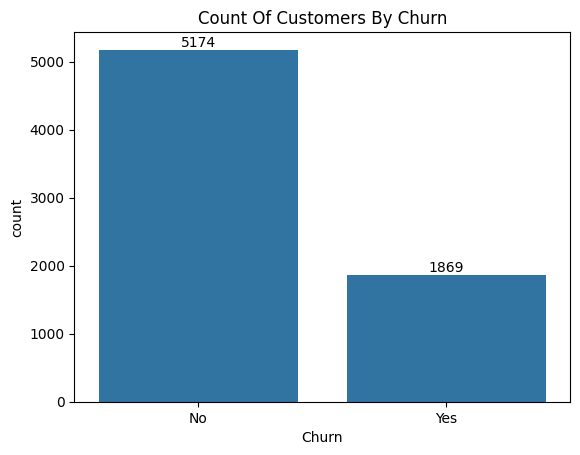

In [10]:
ax = sns.countplot(x = df['Churn'], data = df)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Churn")
plt.show()

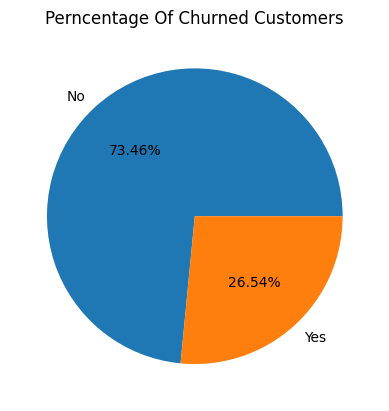

In [11]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Perncentage Of Churned Customers")
plt.show()

Iss chart se hum conclude kar saktae hain 26.54% customers ne churned out karliy ahay. AB explore karte hain ke kiya reason hosakta hay?

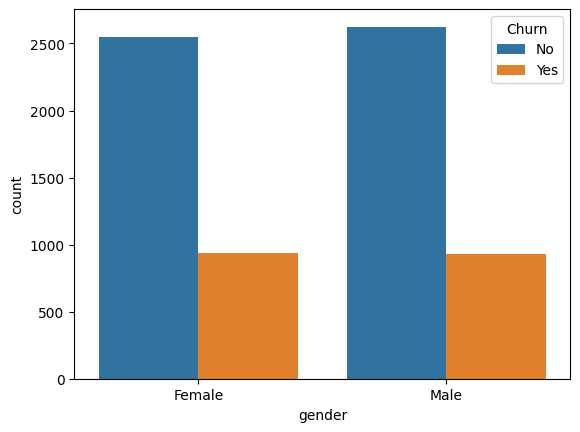

In [12]:

sns.countplot(x = 'gender', data=df, hue='Churn')
ax.bar_label = ax.containers[0]
plt.show()

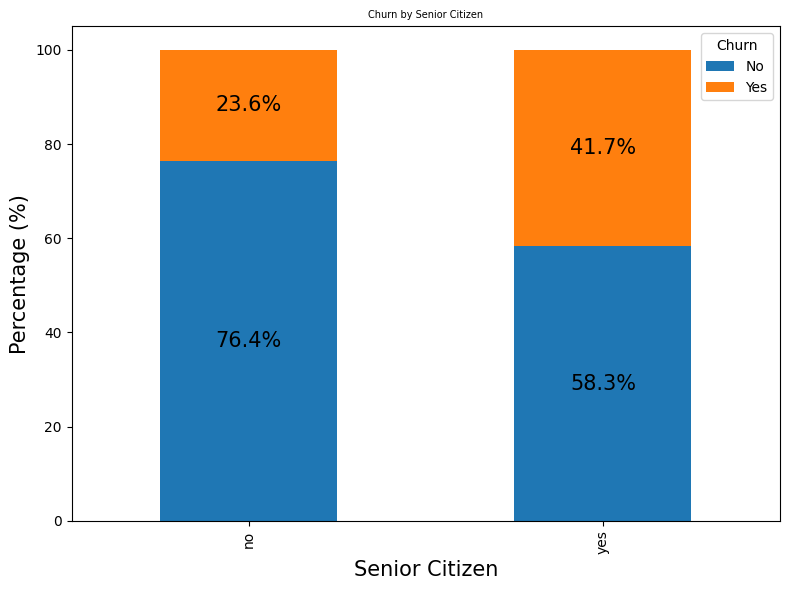

In [13]:
# Calculate counts
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = percentages.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add percentage labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Avoid labels on zero-height sections
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # x-coordinate
                bar.get_y() + height / 2,           # y-coordinate
                f'{height:.1f}%',                   # Label text (percentage)
                ha='center',                        # Horizontal alignment
                va='center',                        # Vertical alignment
                fontsize=15, color='black'
            )

# Set labels and title
ax.set_xlabel('Senior Citizen', fontsize=15)
ax.set_ylabel('Percentage (%)', fontsize=15)
ax.set_title('Churn by Senior Citizen', fontsize=7)

plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

Comparatively senior citizen category zyada percent logog ne churn out karliya hay

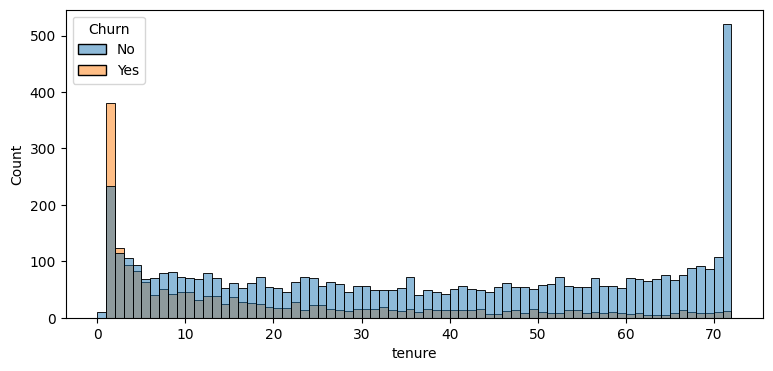

In [14]:
plt.figure(figsize=(9,4))
sns.histplot(x = 'tenure', data=df, bins=72, hue='Churn')
plt.show()

kaafe sare logon ne early stages me churn out karliye
Wo log jinhon ne buht arsay tak sevices use ken wo tikay rahe

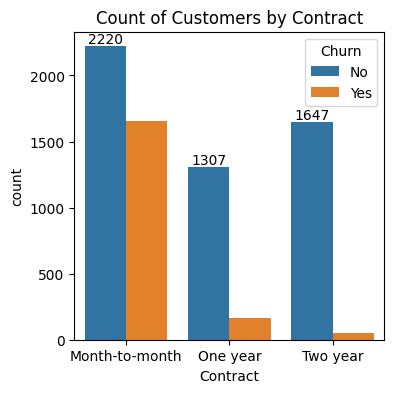

In [15]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x= "Contract", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

Wo log jinhon ne month to month contract liya unka churn out zyada hay. Contract ka arsa jitna zyada hay curn out utna kam hay.

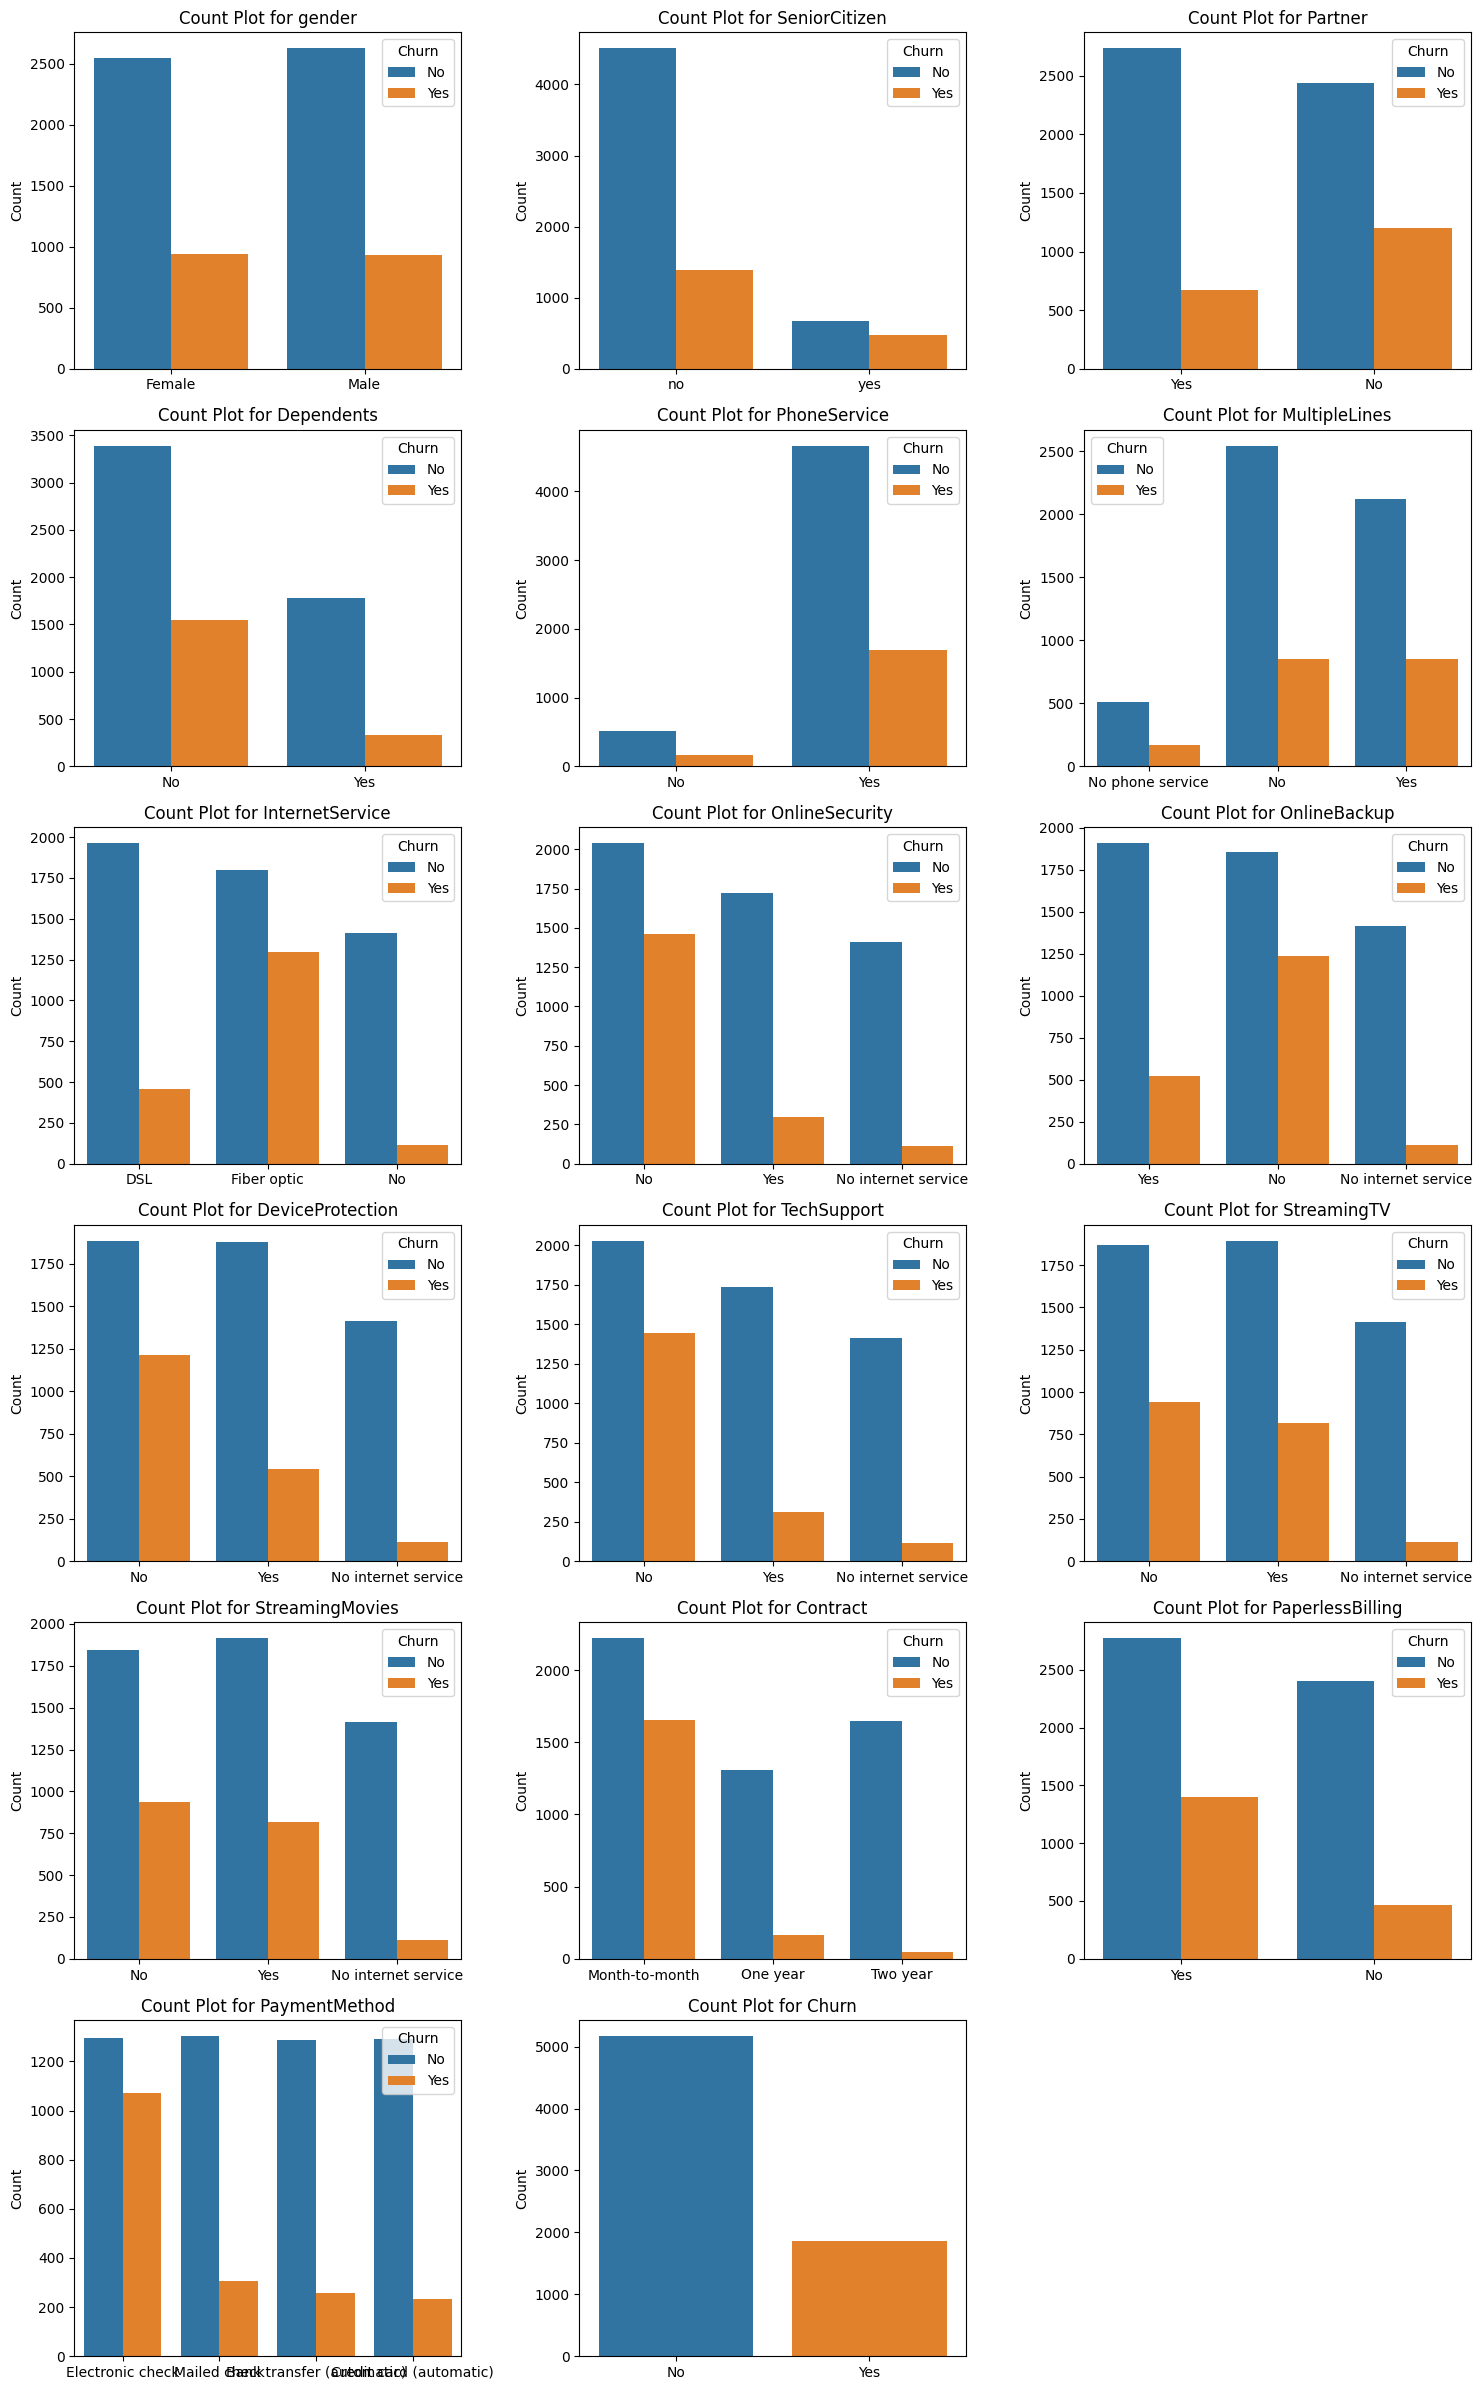

In [26]:
# Assuming `df` is your DataFrame
columns_to_plot = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Define the grid size based on the number of columns
n_cols = 3  # Number of columns in the grid
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Loop through columns and create count plots
for i, column in enumerate(columns_to_plot):
    ax = axes[i]  # Get the corresponding subplot axis
    sns.countplot(data=df, x=column, ax=ax, hue='Churn')
    ax.set_title(f'Count Plot for {column}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# Hide unused subplots if the grid is larger than the number of plots
for j in range(len(columns_to_plot), len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


Isight:
Zyada tar customers jo churn nahi karte, unke paas services jaise PhoneService, InternetService (khaas tor par DSL), aur OnlineSecurity enabled hoti hain. OnlineBackup, TechSupport, aur StreamingTV jaisi services ke liye, churn rates noticeably zyada hoti hain jab yeh services use nahi hoti ya unavailable hoti hain.

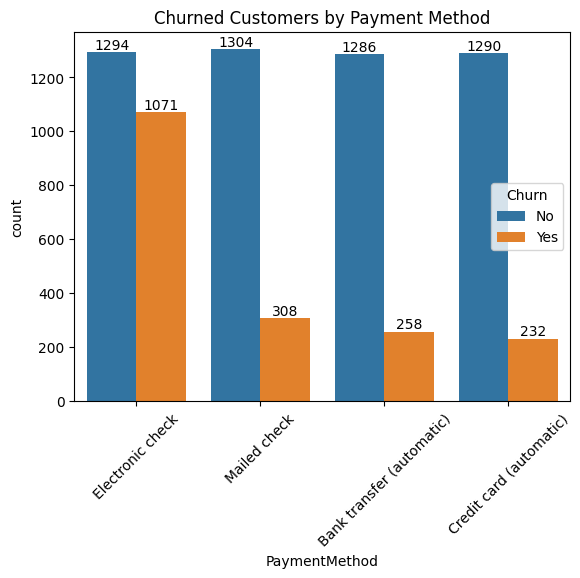

In [24]:
ax = sns.countplot(x = "PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

Customer ke churn karne ki zyada chances hain agar wo electronic check kae zariye pay kart hay.